In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [218]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
sample = pd.read_csv('sampleSubmission.csv')

# Exploratory Data Analysis

In [219]:
print(stores.head().append(stores.tail()),"\n")
print("Structure of Store:\n",stores.shape, "\n")
print("Number of missing values:\n",stores.isnull().sum().sort_values(ascending=False),"\n")

    Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221 

Structure of Store:
 (45, 3) 

Number of missing values:
 Size     0
Type     0
Store    0
dtype: int64 



In [220]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [221]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [222]:
dataset = train.merge(stores, how='left').merge(features, how='left')
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808


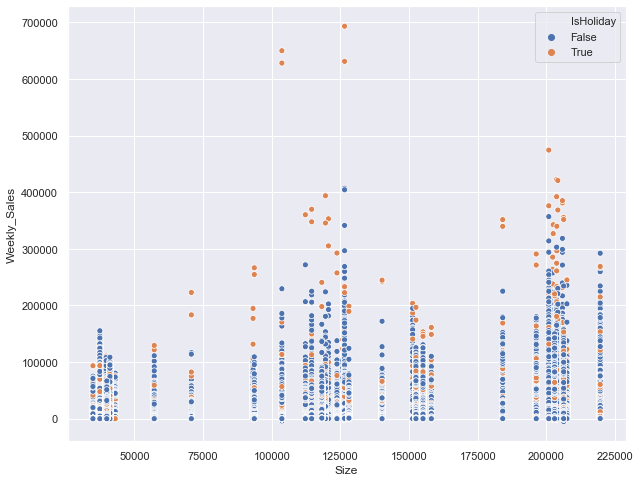

In [223]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(dataset['Size'],dataset['Weekly_Sales'],hue=dataset['IsHoliday']);

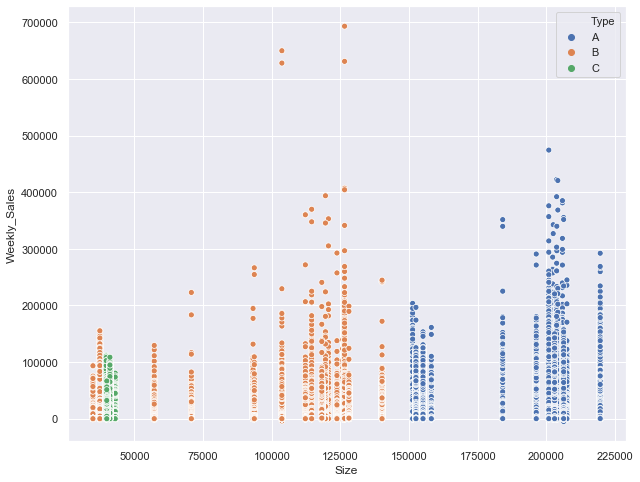

In [224]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(dataset['Size'],dataset['Weekly_Sales'],hue=dataset['Type']);

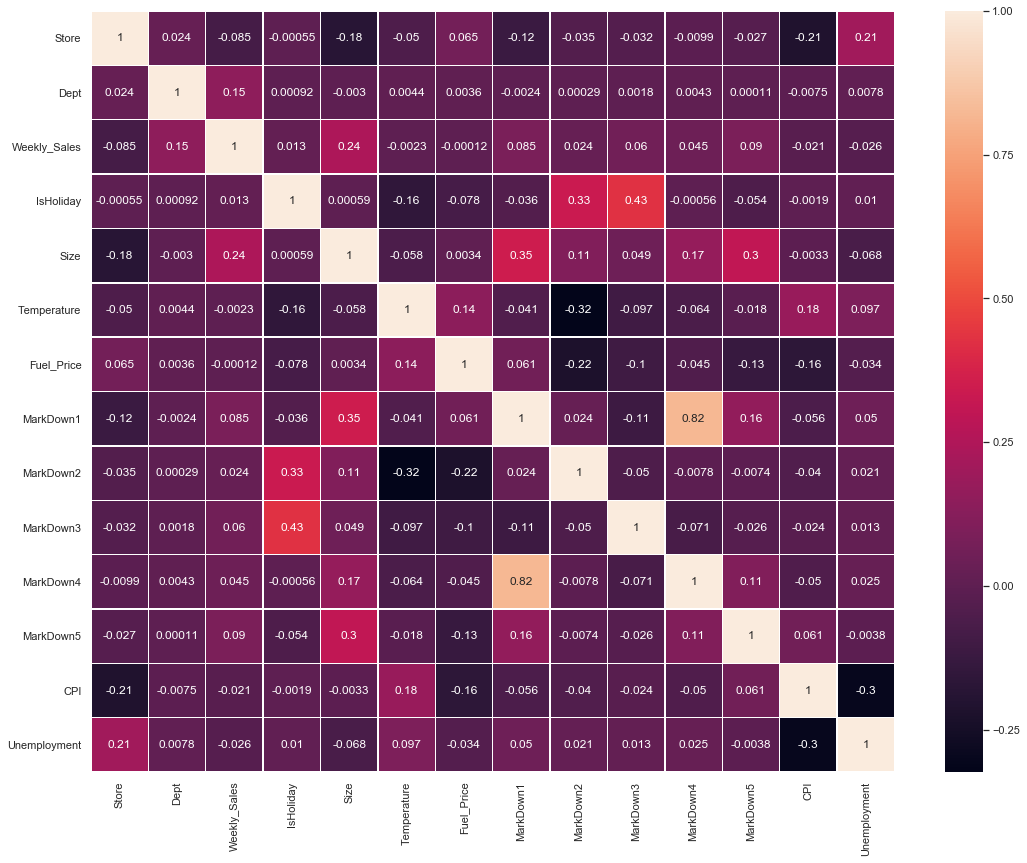

In [225]:
fig = plt.figure(figsize=(18, 14))
sns.heatmap(dataset.corr(),linewidths=0.5,annot=True);

In [226]:
features_percent_missing = features.isnull().sum()*100/len(features)
features_datatype = features.dtypes

features_summary = pd.DataFrame({"Percent_Missing":features_percent_missing.round(2),
                             "Datatypes":features_datatype})

features_summary

,Percent_Missing,Datatypes
Store,0.00,int64
Date,0.00,object
Temperature,0.00,float64
Fuel_Price,0.00,float64
MarkDown1,50.77,float64
MarkDown2,64.33,float64
MarkDown3,55.89,float64
MarkDown4,57.70,float64
MarkDown5,50.55,float64
CPI,7.14,float64


# Data Pre-Processing

In [227]:
dataset = dataset.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], axis =1)

In [228]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625


In [229]:
print(dataset.dtypes, dataset.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
dtype: object Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
dtype: object


In [230]:
cat_col = ['IsHoliday','Type']

In [231]:
for col in cat_col:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(dataset[col].values.astype('str'))
    dataset[col] = lbl.transform(dataset[col].values.astype('str'))

In [232]:
for col in cat_col:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(dataset[col].values.astype('str'))
    dataset[col] = lbl.transform(dataset[col].values.astype('str'))

In [233]:
dataset.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price'],
      dtype='object')

In [234]:
final_dataset = dataset[['Store', 'Dept', 'Date','IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'Weekly_Sales']]

In [235]:
# # Save the new processed file
final_dataset.to_csv("final_dataset.csv", index=False)

# End of Workbook_1